# Logistic Binary Regression

Estimating obesity using eating habits and physical condition Data Set from UCI ML Dataset (https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#) using **Logistic regression**


## Reading and visualizing the data


In [16]:
import pandas as pd

obesity_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

obesity_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Cleaning and preparing data

In [17]:
import numpy as np

# Change Age as integers
obesity_df['Age'] = obesity_df['Age'].astype(int)

# Up to 2 decimal values

obesity_df = np.round(obesity_df, decimals=2)
crit = (obesity_df.dtypes == 'object').values
obesity_df['NObeyesdad'].unique()

# Merging classes for the binary classification problem
l_replace = ['Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III']
obesity_df = obesity_df.replace(l_replace, 'Overweight')
obesity_df = obesity_df.replace('Insufficient_Weight', 'Normal_Weight')

# Renaming columns
obesity_df.rename(columns={'NObeyesdad':'y', 'family_history_with_overweight':'Overweight_family'},inplace=True)

# changing labels into numeric value
obesity_df = obesity_df.replace('Normal_Weight', 0)
obesity_df = obesity_df.replace('Overweight', 1)

obesity_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Overweight_family', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'y'],
      dtype='object')

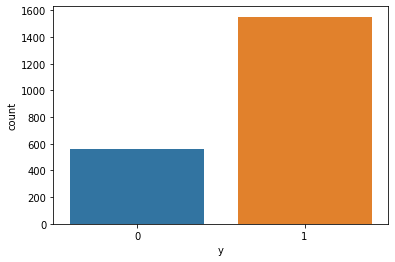

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


obesity_df['y'].value_counts()

sns.countplot(x = 'y', data=obesity_df)

Separate only numeric values 

In [19]:
idx = obesity_df.dtypes != 'object'
obesity_df = obesity_df.loc[:,idx.values]



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


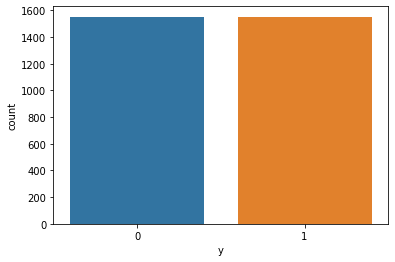

In [20]:
from imblearn.over_sampling import SMOTE

X = obesity_df.loc[:, obesity_df.columns != 'y']
y = obesity_df.loc[:, obesity_df.columns == 'y']

os = SMOTE(random_state=0)
columns = X.columns

os_data_X,os_data_y=os.fit_sample(X, y.values.flatten())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

sns.countplot(x = 'y', data=os_data_y)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
y_train = np.ravel(y_train)

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(
    f'Accuracy of logistic regression classifier on test set:{round(logreg.score(X_test, y_test),2)}')

Accuracy of logistic regression classifier on test set:0.95


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       458
           1       0.96      0.95      0.95       474

    accuracy                           0.95       932
   macro avg       0.95      0.95      0.95       932
weighted avg       0.95      0.95      0.95       932

